## K_means with one hot encoder

In [199]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [200]:
pd.options.display.max_columns = None

In [201]:
df = pd.read_csv('marketing_campaign_imputed.csv')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Total_Spent,Total_Num_of_Purchases,children_home,Age,Time_since_customer(Years),Income_categories
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,1617,22,0,57,2.658508,Upper_middle
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,27,4,2,60,0.342238,Lower_middle
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,776,20,0,49,1.292292,Upper_middle
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,53,6,1,30,0.177964,Lower_middle
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,422,14,1,33,0.878868,Upper_middle
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,716,20,1,47,1.240272,Upper_middle
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,590,17,1,43,2.061644,Upper_middle
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,169,8,1,29,1.336099,Lower_middle
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,1,46,5,1,40,1.500373,Lower_middle
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,49,1,2,64,0.733759,Low


In [332]:
df_clusters= df[['Education','Marital_Status','Income','Total_Spent','children_home','Age','Total_Num_of_Purchases']]

In [203]:
df_clusters.head()

,Education,Marital_Status,Income,Total_Spent,children_home,Age,Total_Num_of_Purchases
0,Graduation,Single,58138.0,1617,0,57,22
1,Graduation,Single,46344.0,27,2,60,4
2,Graduation,Together,71613.0,776,0,49,20
3,Graduation,Together,26646.0,53,1,30,6
4,PhD,Married,58293.0,422,1,33,14


In [204]:

df['Education'].value_counts()

Graduation    1126
PhD            485
Master         370
2n Cycle       202
Basic           54
Name: Education, dtype: int64

In [205]:
df['Marital_Status'].value_counts()

Married     864
Together    578
Single      479
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [206]:
df_dummies = pd.get_dummies(df_clusters)

In [207]:
df_dummies

,Income,Total_Spent,children_home,Age,Total_Num_of_Purchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,1617,0,57,22,0,0,1,0,0,0,0,0,0,1,0,0,0
1,46344.0,27,2,60,4,0,0,1,0,0,0,0,0,0,1,0,0,0
2,71613.0,776,0,49,20,0,0,1,0,0,0,0,0,0,0,1,0,0
3,26646.0,53,1,30,6,0,0,1,0,0,0,0,0,0,0,1,0,0
4,58293.0,422,1,33,14,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,61223.0,1341,1,47,16,0,0,1,0,0,0,0,0,1,0,0,0,0
2233,64014.0,444,3,68,15,0,0,0,0,1,0,0,0,0,0,1,0,0
2234,56981.0,1241,0,33,18,0,0,1,0,0,0,0,1,0,0,0,0,0
2235,69245.0,843,1,58,21,0,0,0,1,0,0,0,0,0,0,1,0,0


In [437]:
# Standardization
from  sklearn.preprocessing import MinMaxScaler
from  sklearn.preprocessing import StandardScaler


scaled = StandardScaler()



In [209]:
df_scaled = scaled.fit_transform(df_dummies)

In [210]:
df_scaled

array([[0.35108641, 0.63968254, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27767992, 0.00873016, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.43495553, 0.30595238, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.34388518, 0.49047619, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.42021697, 0.33253968, 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [0.31829187, 0.06626984, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

In [211]:
# scatterplot 
df_clusters

,Education,Marital_Status,Income,Total_Spent,children_home,Age,Total_Num_of_Purchases
0,Graduation,Single,58138.0,1617,0,57,22
1,Graduation,Single,46344.0,27,2,60,4
2,Graduation,Together,71613.0,776,0,49,20
3,Graduation,Together,26646.0,53,1,30,6
4,PhD,Married,58293.0,422,1,33,14
...,...,...,...,...,...,...,...
2232,Graduation,Married,61223.0,1341,1,47,16
2233,PhD,Together,64014.0,444,3,68,15
2234,Graduation,Divorced,56981.0,1241,0,33,18
2235,Master,Together,69245.0,843,1,58,21


In [215]:
from sklearn.cluster import KMeans 

In [216]:
# heirarchy
wcss=[]

for i in range(1,9):
    kmean = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df_scaled)
    wcss.append(kmean.inertia_)

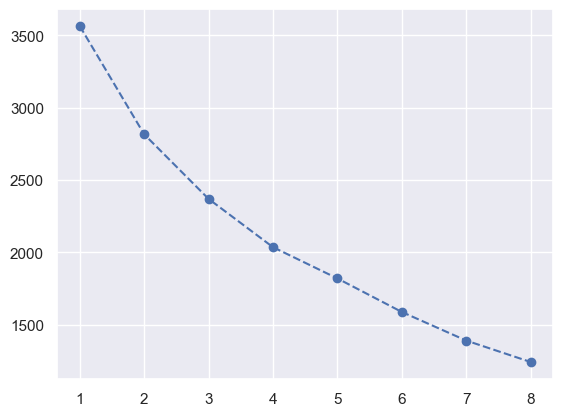

In [217]:
plt.plot(range(1,9),wcss,marker='o',linestyle='--')

In [218]:
kmean = KMeans(n_clusters=4,init='k-means++',random_state=42)

In [219]:
kmean.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [220]:
df_segmentation = df_dummies.copy()

In [221]:
df_segmentation['segment_kmeans']= kmean.labels_

In [222]:
df_segmentation['segment_kmeans'].value_counts()

2    591
3    589
0    578
1    479
Name: segment_kmeans, dtype: int64

In [223]:
df_segmentation


,Income,Total_Spent,children_home,Age,Total_Num_of_Purchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,segment_kmeans
0,58138.0,1617,0,57,22,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,46344.0,27,2,60,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,71613.0,776,0,49,20,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,26646.0,53,1,30,6,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,58293.0,422,1,33,14,0,0,0,0,1,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,61223.0,1341,1,47,16,0,0,1,0,0,0,0,0,1,0,0,0,0,3
2233,64014.0,444,3,68,15,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2234,56981.0,1241,0,33,18,0,0,1,0,0,0,0,1,0,0,0,0,0,3
2235,69245.0,843,1,58,21,0,0,0,1,0,0,0,0,0,0,1,0,0,0


Text(0, 0.5, ' Money Spent')

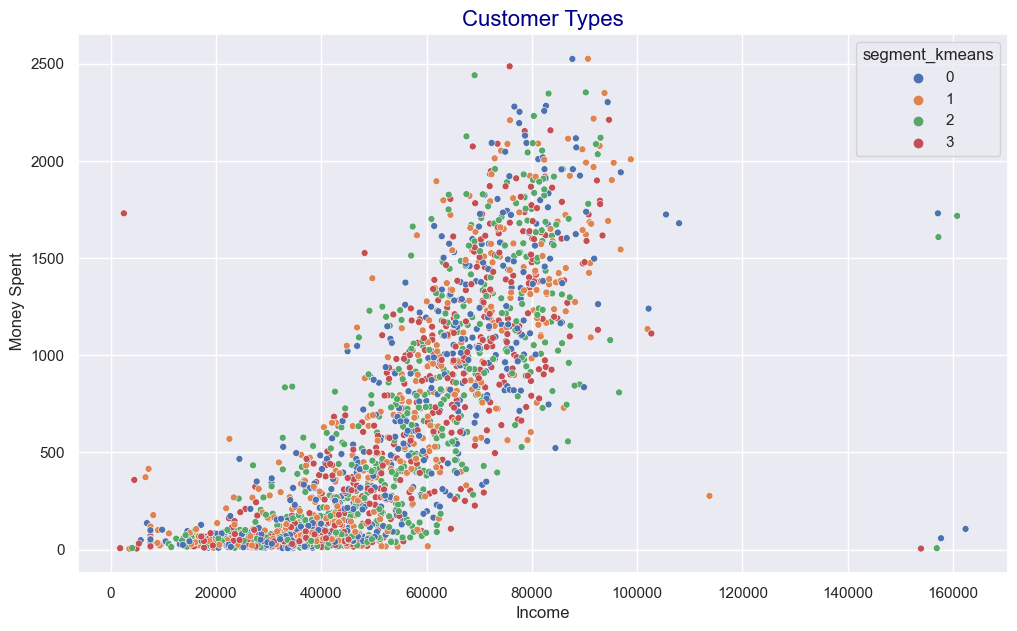

In [224]:
sb.set(style="darkgrid")
plt.figure(figsize=(12,7))
sb.scatterplot(data=df_segmentation,x='Income',y='Total_Spent', hue='segment_kmeans', palette='deep', s=25).set_title(label='Customer Types', fontsize=16, color='darkblue')
plt.ylabel(' Money Spent')

## K_Means with Label Encoder

In [443]:
from sklearn.preprocessing import LabelEncoder
labelcol=['Marital_Status','Education']
df_clust_label = df_clusters.copy()
df_clust_label[labelcol]= df_clusters[labelcol].apply(LabelEncoder().fit_transform)


In [444]:
df_clust_label

,Education,Marital_Status,Income,Total_Spent,children_home,Age,Total_Num_of_Purchases
0,2,4,58138.0,1617,0,57,22
1,2,4,46344.0,27,2,60,4
2,2,5,71613.0,776,0,49,20
3,2,5,26646.0,53,1,30,6
4,4,3,58293.0,422,1,33,14
...,...,...,...,...,...,...,...
2232,2,3,61223.0,1341,1,47,16
2233,4,5,64014.0,444,3,68,15
2234,2,2,56981.0,1241,0,33,18
2235,3,5,69245.0,843,1,58,21


In [445]:
df_scaled2 = scaled.fit_transform(df_clust_label)

In [446]:
df_scaled2

array([[-0.35090073,  0.25216292,  0.28839434, ..., -1.26461829,
         1.00669091,  1.31251958],
       [-0.35090073,  0.25216292, -0.2613426 , ...,  1.39542037,
         1.26117928, -1.1857037 ],
       [-0.35090073,  1.18146846,  0.91648534, ..., -1.26461829,
         0.32805526,  1.03493922],
       ...,
       [-0.35090073, -1.60644815,  0.23446474, ..., -1.26461829,
        -1.02921603,  0.75735885],
       [ 0.53908219,  1.18146846,  0.80610912, ...,  0.06540104,
         1.09152037,  1.1737294 ],
       [ 1.42906511, -0.67714261,  0.04279794, ...,  1.39542037,
         1.26117928, -0.63054297]])

In [447]:
krange = range(1,20)
sse = []
for k in krange:
    Km = KMeans (n_clusters=k)
    Km.fit(df_scaled2)
    sse.append(Km.inertia_)
    
    

Text(0, 0.5, 'Sum of Squared Error')

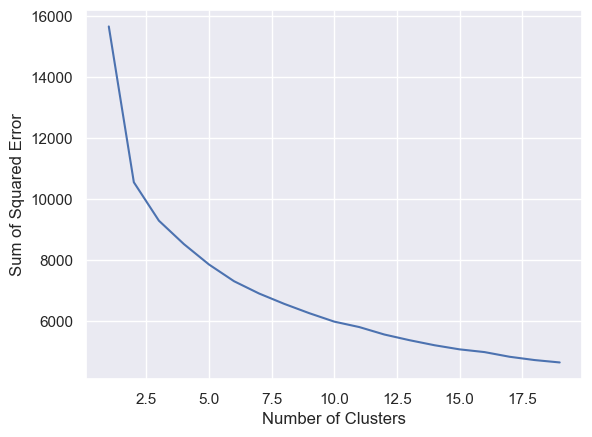

In [448]:
plt.plot(krange,sse)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')

In [449]:
Km = KMeans(n_clusters=4)
Km.fit(df_scaled2)
labels_predicted2 = Km.predict(df_scaled2)

In [450]:
df_clusters_kLA= df_clusters.copy()
df_clusters_kLA['clusters']= labels_predicted2

In [451]:
df_clusters

,Education,Marital_Status,Income,Total_Spent,children_home,Age,Total_Num_of_Purchases
0,Graduation,Single,58138.0,1617,0,57,22
1,Graduation,Single,46344.0,27,2,60,4
2,Graduation,Together,71613.0,776,0,49,20
3,Graduation,Together,26646.0,53,1,30,6
4,PhD,Married,58293.0,422,1,33,14
...,...,...,...,...,...,...,...
2232,Graduation,Married,61223.0,1341,1,47,16
2233,PhD,Together,64014.0,444,3,68,15
2234,Graduation,Divorced,56981.0,1241,0,33,18
2235,Master,Together,69245.0,843,1,58,21


Text(0, 0.5, ' Money Spent')

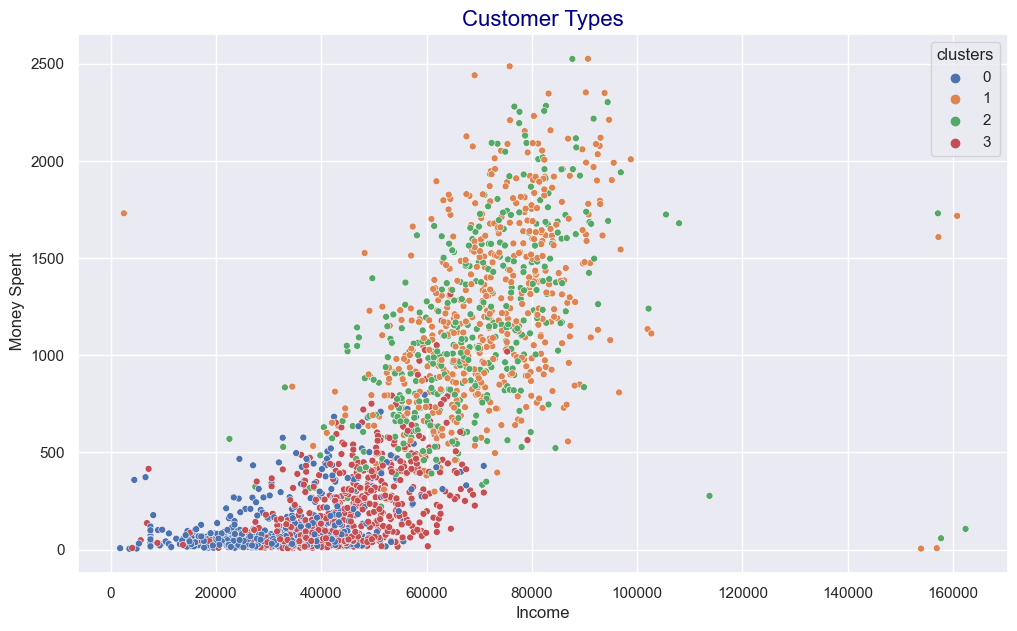

In [452]:
sb.set(style="darkgrid")
plt.figure(figsize=(12,7))
sb.scatterplot(data=df_clusters_kLA,x='Income',y='Total_Spent', hue='clusters', palette='deep', s=25).set_title(label='Customer Types', fontsize=16, color='darkblue')
plt.ylabel(' Money Spent')



In [453]:
df_summary_LE = df_clusters_kLA.groupby('clusters').agg(
    {
        'Total_Spent': 'mean',
        'Income':'mean',
        'Total_Num_of_Purchases': 'mean',
        'Age': 'mean',
        'children_home': lambda x: x.value_counts().index[0],
        'Education': lambda x: x.value_counts().index[0],
        'Marital_Status': lambda x: x.value_counts().index[0],
    }
)
df_summary_LE

,Total_Spent,Income,Total_Num_of_Purchases,Age,children_home,Education,Marital_Status
clusters,,,,,,,
0,114.780130,30586.029175,6.153094,36.705212,1,Graduation,Married
1,1229.594203,72115.598932,19.489130,44.786232,0,Graduation,Married
2,1116.127098,68761.957829,19.004796,50.410072,0,Graduation,Together
3,214.701835,44270.045371,8.559633,49.972477,2,Graduation,Married


# PCA

In [454]:
from sklearn.decomposition import PCA

In [455]:
pca = PCA()

In [456]:
pca.fit(df_scaled2)

PCA()

In [457]:
pca.fit(df_scaled2).explained_variance_ratio_

array([0.41194148, 0.17753967, 0.14312906, 0.11878885, 0.08987835,
       0.03723789, 0.0214847 ])

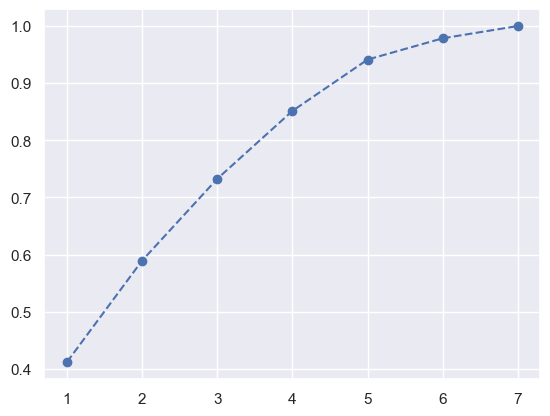

In [458]:
plt.plot(range(1,8),pca.fit(df_scaled2).explained_variance_ratio_.cumsum(),marker='o',linestyle='--')

In [499]:
pca1 = PCA(n_components=5)
pca1.fit(df_scaled2)

PCA(n_components=5)

In [500]:
len(pca1.components_)

5

In [501]:
df_pca=pd.DataFrame(data=pca1.components_,columns=df_clusters.columns, index=['PC1','PC2','PC3','PC4','PC5'])

In [502]:
df_pca

,Education,Marital_Status,Income,Total_Spent,children_home,Age,Total_Num_of_Purchases
PC1,0.093582,0.018203,0.522456,0.552909,-0.339593,0.126144,0.530101
PC2,-0.596835,-0.140998,-0.072542,0.072647,-0.419447,-0.661365,-0.005397
PC3,0.198552,-0.973630,0.039054,0.002170,0.095104,-0.036192,0.027166
PC4,-0.765397,-0.151102,0.058147,-0.000719,0.220985,0.575600,0.088346
PC5,0.088368,-0.094099,-0.264618,-0.124998,-0.792910,0.460433,-0.238713


In [503]:
kmean = KMeans(n_clusters=4,init='k-means++',random_state=42)

In [504]:
pca_scores = pca1.transform(df_scaled2)

In [505]:
pca_scores

array([[ 2.303884  ,  0.13261429, -0.42132407,  0.66198245,  0.81179992],
       [-1.63992561, -1.29004541, -0.27262465,  1.1455205 , -0.10806489],
       [ 1.64340075,  0.30480682, -1.28760582,  0.14394311,  0.48665312],
       ...,
       [ 1.3452577 ,  1.70266378,  1.44341486, -0.28077863,  0.27419912],
       [ 1.44880064, -1.27381995, -1.01233805,  0.20188174, -0.1556046 ],
       [-0.90383757, -2.22891355,  1.01307297, -0.00988132, -0.10645326]])

In [506]:

wcss=[]

for i in range(1,20):
    kmean = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(pca_scores)
    wcss.append(kmean.inertia_)

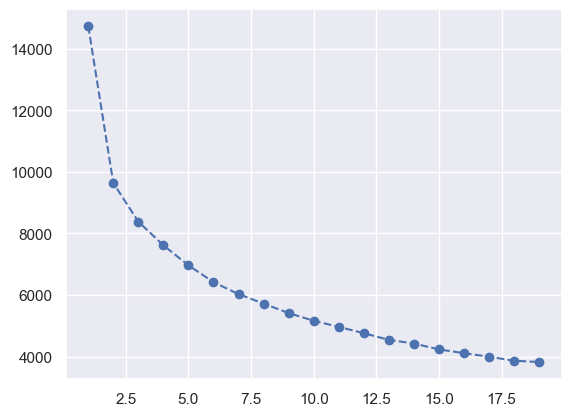

In [509]:
plt.plot(range(1,20),wcss,marker='o',linestyle='--')

In [510]:
kmean = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [511]:
kmean.fit(pca_scores)

KMeans(n_clusters=5, random_state=42)

In [512]:
df_pca_kmeans = pd.concat([df_clusters.reset_index(drop=True),pd.DataFrame(pca_scores)],axis=1)

In [513]:
df_pca_kmeans['labels_pca_kmeans'] = kmean.labels_

In [514]:
df_pca_kmeans

,Education,Marital_Status,Income,Total_Spent,children_home,Age,Total_Num_of_Purchases,0,1,2,3,4,labels_pca_kmeans
0,Graduation,Single,58138.0,1617,0,57,22,2.303884,0.132614,-0.421324,0.661982,0.811800,0
1,Graduation,Single,46344.0,27,2,60,4,-1.639926,-1.290045,-0.272625,1.145520,-0.108065,3
2,Graduation,Together,71613.0,776,0,49,20,1.643401,0.304807,-1.287606,0.143943,0.486653,0
3,Graduation,Together,26646.0,53,1,30,6,-1.801024,0.888139,-1.240033,-0.782545,-0.141378,4
4,PhD,Married,58293.0,422,1,33,14,0.062158,-0.148906,1.002875,-1.534176,-0.424063,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,Graduation,Married,61223.0,1341,1,47,16,1.108367,0.227545,0.622665,0.543160,-0.327852,2
2233,PhD,Together,64014.0,444,3,68,15,-0.199704,-3.507760,-0.646935,0.509529,-1.449354,3
2234,Graduation,Divorced,56981.0,1241,0,33,18,1.345258,1.702664,1.443415,-0.280779,0.274199,2
2235,Master,Together,69245.0,843,1,58,21,1.448801,-1.273820,-1.012338,0.201882,-0.155605,0


In [515]:
 df_pca_kmeans[0]

0       2.303884
1      -1.639926
2       1.643401
3      -1.801024
4       0.062158
          ...   
2232    1.108367
2233   -0.199704
2234    1.345258
2235    1.448801
2236   -0.903838
Name: 0, Length: 2237, dtype: float64

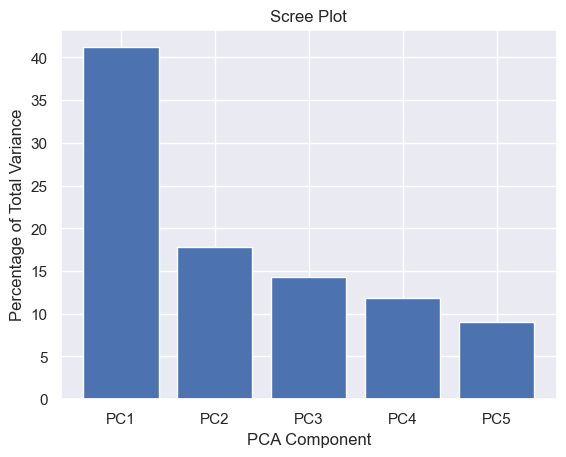

In [516]:
per_var = np.round(pca1.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+ str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height= per_var, tick_label=labels)
plt.ylabel('Percentage of Total Variance')
plt.xlabel('PCA Component')
plt.title('Scree Plot')
plt.show()

<AxesSubplot: >

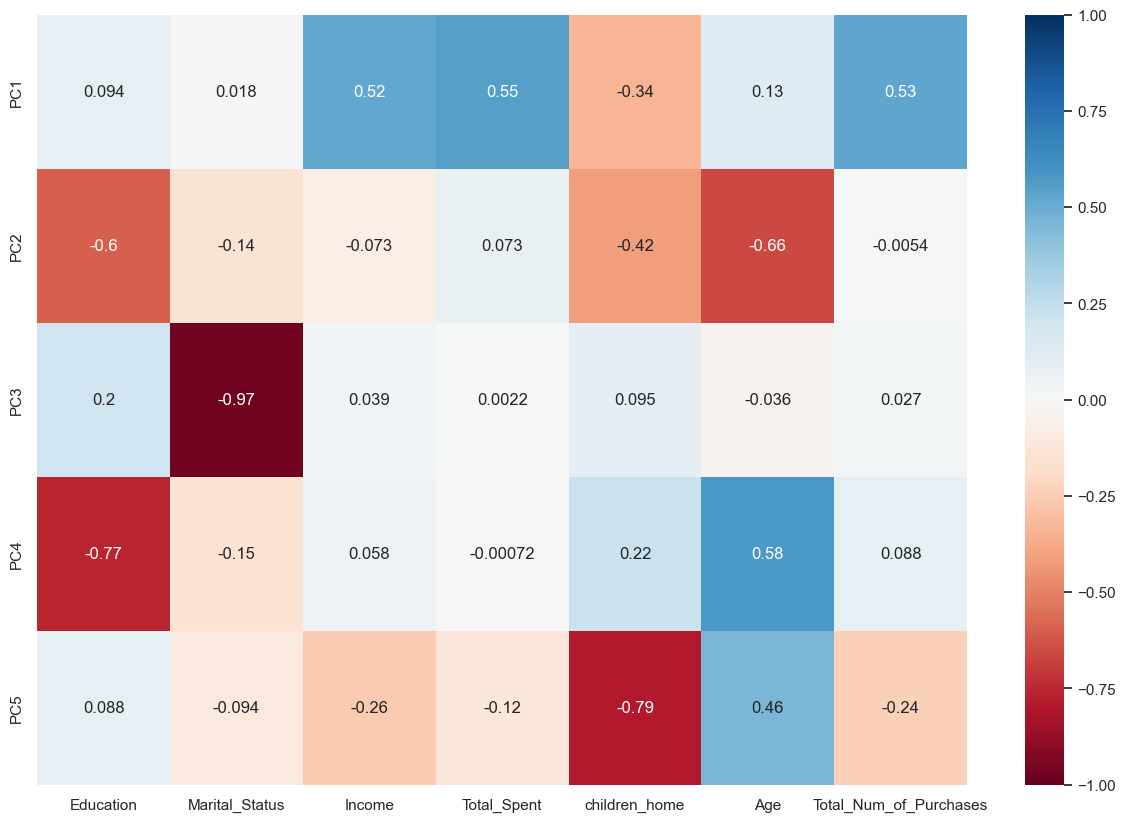

In [517]:
plt.figure(figsize=(15,10))
sb.heatmap(data=df_pca,vmin=-1,vmax=1,cmap='RdBu',annot=True)


In [518]:
laoding_scores1 = pd.Series(pca1.components_[1],df_pca.columns)
laoding_scores1_sorted = laoding_scores1.abs().sort_values(ascending=False)
laoding_scores1_sorted.head(50)

Age                       0.661365
Education                 0.596835
children_home             0.419447
Marital_Status            0.140998
Total_Spent               0.072647
Income                    0.072542
Total_Num_of_Purchases    0.005397
dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

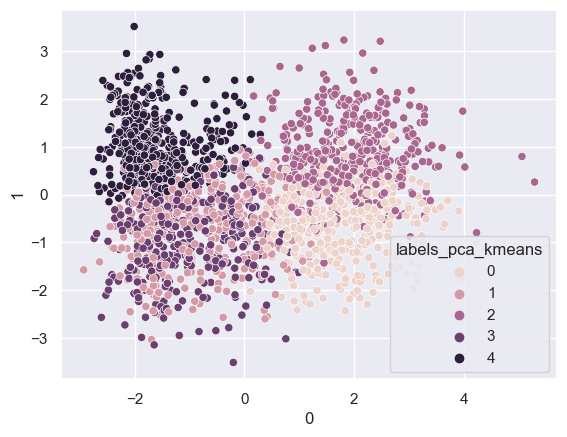

In [528]:
y = df_pca_kmeans[1]
x = df_pca_kmeans[0]
sb.scatterplot(data =df_pca_kmeans, x=x,y=y,hue= df_pca_kmeans['labels_pca_kmeans'])

Text(0, 0.5, ' Money Spent')

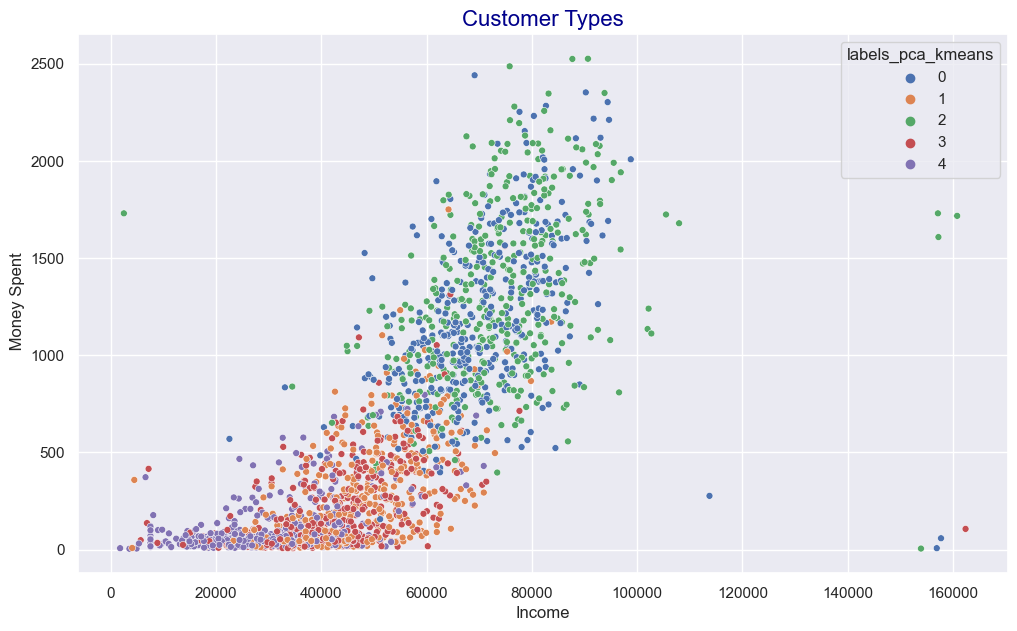

In [520]:
sb.set(style="darkgrid")
plt.figure(figsize=(12,7))
sb.scatterplot(data=df_pca_kmeans,x='Income',y='Total_Spent', hue='labels_pca_kmeans', palette='deep', s=25).set_title(label='Customer Types', fontsize=16, color='darkblue')
plt.ylabel(' Money Spent')

In [521]:
df_summary_pca = df_pca_kmeans.groupby('labels_pca_kmeans').agg(
    {
        'Total_Spent': 'mean',
        'Income':'mean',
        'Total_Num_of_Purchases': 'mean',
        'Age': 'mean',
        'children_home': lambda x: x.value_counts().index[0],
        'Education': lambda x: x.value_counts().index[0],
        'Marital_Status': lambda x: x.value_counts().index[0],
    }
)
df_summary_pca

,Total_Spent,Income,Total_Num_of_Purchases,Age,children_home,Education,Marital_Status
labels_pca_kmeans,,,,,,,
0,1159.574371,70170.098188,19.272311,57.237986,0,Graduation,Together
1,281.413712,46380.780292,9.803783,48.881797,1,Graduation,Married
2,1306.796875,73813.064994,19.962054,37.290179,0,Graduation,Married
3,212.119512,42721.428315,8.390244,49.295122,1,Graduation,Together
4,109.566474,29569.435286,5.986513,35.366089,1,Graduation,Married
